In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns

# Common Activation Functions

## The Sigmoid Function


In [35]:
def sigmoid(z):
    exp_minus_z = np.exp(-z)
    frac = 1/(1+exp_minus_z)
    
    return frac

# The derivative of sigmoid
def diff_sigmoid(z):
    sigma_z = sigmoid(z)
    f = sigma_z*(1-sigma_z)
    return f

In [43]:
# Generate input values from -10 to 10, which covers the range of interest
x_values = np.linspace(-10, 10, 400)
# Compute the sigmoid function for each input
y_values = sigmoid(x_values)
# Compute the derivative of the sigmoid function for each input
y_derivatives = diff_sigmoid(x_values)

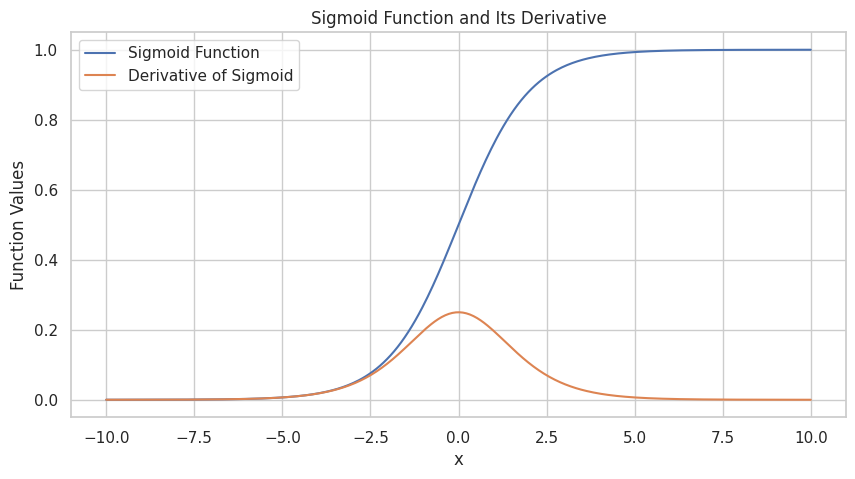

In [44]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a plot with a specific size
plt.figure(figsize=(10, 5))

# Plot the sigmoid function
sns.lineplot(x=x_values, y=y_values, label='Sigmoid Function')

# Plot the derivative of the sigmoid function
sns.lineplot(x=x_values, y=y_derivatives, label='Derivative of Sigmoid')

# Adding the title and labels
plt.title('Sigmoid Function and Its Derivative')
plt.xlabel('x')
plt.ylabel('Function Values')

# Show the plot
plt.show()

## Hyperbolic Tangent

